# 0. Importing PyTorch and setting up device-agnostic code

Famous computer vision dataset: Food 101

In [2]:
import torch 
from torch import nn

torch.__version__

'2.5.1'

In [3]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1.Get data

In [1]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} already existed!")
else:
    print(f"Did not find {image_path}, installing one...")
    image_path.mkdir(parents=True, exist_ok=True)
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)
    
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("unzipping data...")
        zip_ref.extractall(image_path)
        

Did not find data/pizza_steak_sushi, installing one...
unzipping data...


In [4]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir


(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# 2. Prepare data | Become one with the data (data preparation)

In [7]:
import random
from PIL import Image

Random image path: data/pizza_steak_sushi/test/sushi/2385731.jpg
Image class: sushi
Image height: 512
Image width: 512


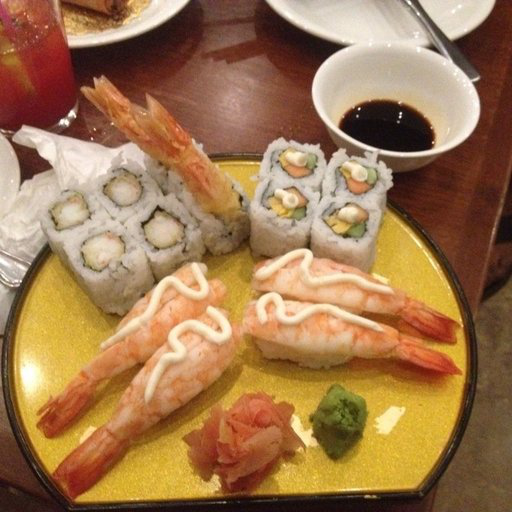

In [12]:
random.seed(206)

# 1. Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
image_path_list = list(image_path.glob("*/*/*.jpg"))
# 2. Pick a random image path using Python's random.choice().
random_image_path = random.choice(image_path_list)
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img


(-0.5, 511.5, 511.5, -0.5)

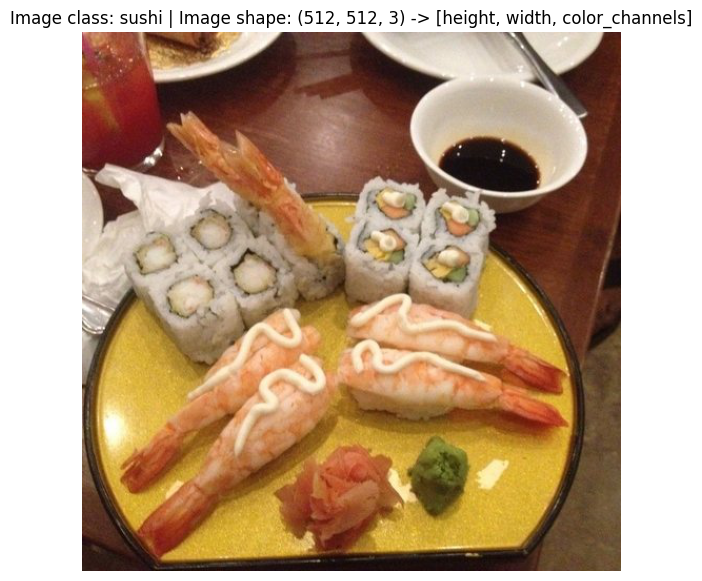

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# We can do the same with matplotlib.pyplot.imshow(), 
# except we have to convert the image to a NumPy array first.

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)


# 3. Transforming data